In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [242]:
def plot_line (xlab="", ylab="", title="", x=[], y=[]):
    plt.figure (dpi = 100)
    plt.xlabel (xlab)
    plt.ylabel (ylab)
    plt.title (title)
    plt.plot (x, y)
    plt.show ()

def plot_scatter (xlab="", ylab="", title="", x=[], y=[], lbf=False, color="blue", lbfcolor="blue", annotate=False, annotations=[], dist=0.2):
    plt.figure (dpi = 100)
    plt.xlabel (xlab)
    plt.ylabel (ylab)
    plt.title (title)
    plt.grid (True)
    plt.scatter (x, y, marker=".", c=y, cmap="winter")
    if (lbf):
        x = np.array (x).reshape (-1, 1)
        y = np.array (y).reshape (-1, 1)
        reg = LinearRegression ().fit (x, y)
        y_pred = reg.predict (x)
        icpt = reg.intercept_ [0]
        slp = reg.coef_ [0][0]
        plt.plot (x, y_pred, label=str(round(icpt, 4))+"+"+str(round(slp, 4))+"x", color=lbfcolor)
        plt.legend()
        
    if (annotate):
        for i in range(len(annotations)):
            plt.annotate(annotations[i], (x[i], y[i] + dist), fontsize=8)
    plt.show ()

def R_squared (X, y):
    X = np.array (X).reshape (-1, 1)
    y = np.array (y).reshape (-1, 1)
    reg = LinearRegression ().fit (X, y)
    return reg.score (X, y)

Some plotting functions that will be used repeatedly

In [ ]:
fpl = pd.read_csv (r"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/cleaned_merged_seasons.csv")
fpl.drop (fpl.columns[[0]], axis=1, inplace=True)

In [95]:
pd.set_option('display.max_columns', None)
fpl.head ()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,Spurs,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,Liverpool,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1


In [96]:
fpl.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

1. Correlation of FPL points vs. Actual PL points

In [97]:
szn_22 = fpl [fpl['season_x']=="2021-22"]

In [98]:
teams = set ()
for team in szn_22['team_x']:
    teams.add (team)

print (teams)

{'Brentford', 'Norwich', 'Spurs', 'West Ham', 'Watford', 'Man Utd', 'Man City', 'Brighton', 'Leicester', 'Wolves', 'Burnley', 'Arsenal', 'Everton', 'Newcastle', 'Leeds', 'Chelsea', 'Aston Villa', 'Southampton', 'Crystal Palace', 'Liverpool'}


In [99]:
szn_22_rankings = pd.read_csv (r"C:\Users\Bryant Xia\Desktop\ML_FPL\21_22ranking.csv")

In [100]:
club_to_pts = dict ()
for i in range (20):
    club_to_pts [szn_22_rankings['Club'][i]] = szn_22_rankings ['P'][i]

In [101]:
annotations = []
prem_points = []
fpl_points = []

for team in teams:
    team_stats = szn_22[szn_22['team_x']==team]
    team_points = team_stats['total_points'].sum ()
    annotations.append (team)
    prem_points.append (club_to_pts[team])
    fpl_points.append (team_points)

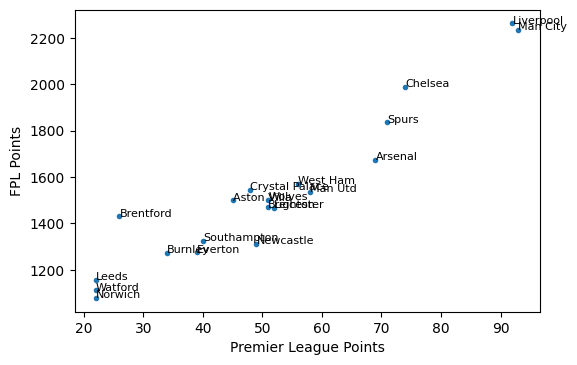

In [104]:
plt.figure (dpi=100)
plt.ylabel ("FPL Points")
plt.xlabel ("Premier League Points")
plt.scatter (prem_points, fpl_points, marker=".")
for i in range(20):
    plt.annotate(annotations[i], (prem_points[i], fpl_points[i] + 0.5), fontsize=8)

In [108]:
R_squared (prem_points, fpl_points)

0.9062273534314477

* Strong correlation
* Clear at the top level, though several teams rank higher in terms of total FPL points than actual PL points
* To be expected bc. FPL favor more goals, etc. --> does not translate one-to-one with wins

2. Cost vs. Returns

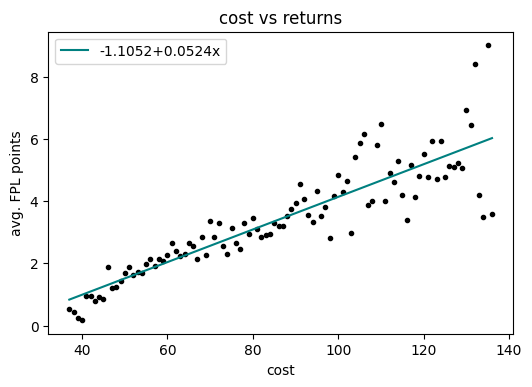

In [158]:
costs_benefits = fpl.groupby ('value')['total_points'].mean ()
costs = list (costs_benefits.index)
benefits = list (costs_benefits)
plot_scatter ("cost", "avg. FPL points", "cost vs returns", costs, benefits, lbf=True, color="black", lbfcolor="teal")

In [159]:
R_squared (costs, benefits)

0.7841322995939496

* Fairly strong linear correlation of FPL points vs. cost, though there is a lot of fluctuation at the high level

3. Top performers 

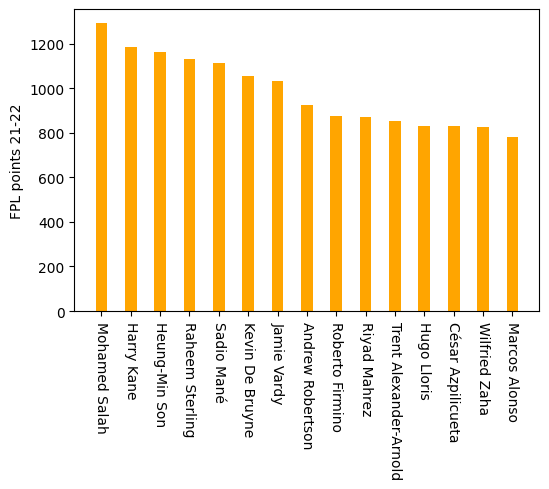

In [187]:
players_points = fpl.groupby ('name')['total_points'].sum ()
players = players_points.index
points = list (players_points)
temp = pd.DataFrame ({
    "players": players,
    "points": points
})
temp=temp.sort_values (by=['points'], ascending=False).reset_index ()
# for i in range (15):
#     print (temp['players'][i], temp['points'][i])
plt.figure (dpi=100)
plt.ylabel ("FPL points 21-22")
plt.bar (temp['players'][:15], temp['points'][:15], width=0.4, color="orange")
plt.xticks(rotation=270)
plt.show ()


4. Auto-correlation plot of previous GW points, goals, etc.

In [201]:
x = []
y = []
for i in range (1, 21):
    x.append (i)
    var_name = 'total_points_prev_'+str(i)
    fpl [var_name] = fpl.groupby('name')['total_points'].shift(i)
    temp = fpl.dropna ()
    y.append (np.corrcoef (temp['total_points'], temp[var_name])[0, 1])

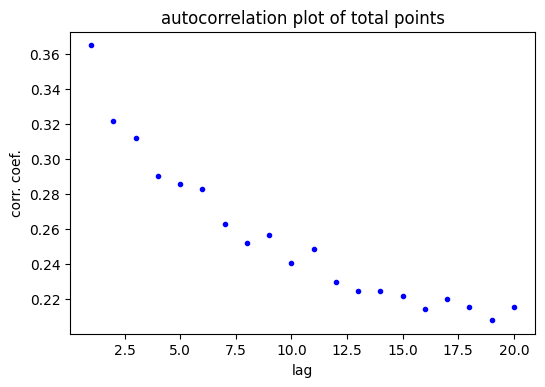

In [202]:
plot_scatter (xlab="lag", ylab="corr. coef.", title="autocorrelation plot of total points", x=x, y=y, lbf=False)

* Performance in previous weeks will be informative in predicting total points earned

5. Mean-Variance Scatter Plot of Players

In [245]:
means = szn_22.groupby ('name')['total_points'].mean ()
devs = szn_22.groupby ('name')['total_points'].std ()
names = means.index 
mid_last = []
for name in names:
    arr = str.split (name, " ")
    comb= ""
    for part in range (1, len(arr)):
        comb += " "+arr[part]
    if (len(arr)==0):
        comb=part
    mid_last.append (comb)
means = list (means)
devs = list (devs)
mv = pd.DataFrame ({
    'names': names,
    'means': means, 
    'devs': devs,
    "shortened_name": mid_last
})
mv = mv.sort_values (by='means', ascending=False).reset_index ()


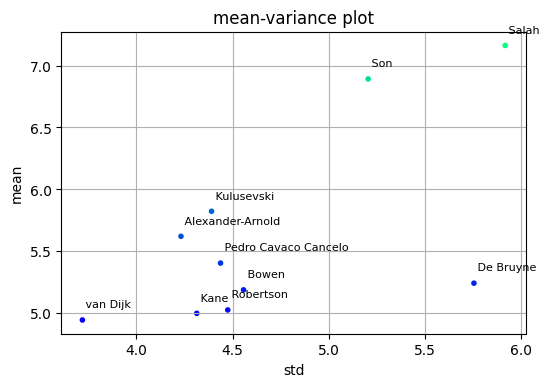

In [247]:
plot_scatter (xlab="std", ylab="mean", title="mean-variance plot", x=mv['devs'][:10], y=mv['means'][:10], lbf=False, annotate=True, annotations=mv['shortened_name'][:10], dist=0.1)

In [248]:
mv ['adj_ret'] = mv['means']/mv['devs']
mv = mv.sort_values (by='adj_ret', ascending=False).reset_index ()

In [249]:
for i in range (15):
    print (mv['names'][i], mv['adj_ret'][i])

Dwight McNeil 3.2641216439564418
Ederson Santana de Moraes 1.6359389774963324
Alisson Ramses Becker 1.5353738103974641
Kenny McLean 1.5181037406335358
Moussa Sissoko 1.497245052117579
Hugo Lloris 1.4364702114093357
Pierre-Emile Højbjerg 1.4019765882096138
David de Gea 1.3828409390428102
Robert Sánchez 1.382643248167202
Virgil van Dijk 1.3299431872571335
Trent Alexander-Arnold 1.3284129964882216
Dejan Kulusevski 1.32629271368115
Heung-Min Son 1.3239178260019577
Stuart Dallas 1.3036549044883234
José Malheiro de Sá 1.2995831169422596


#### Want to merge the new game week information as well

In [269]:
latest = pd.read_csv (r"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/gws/merged_gw.csv")

In [270]:
fpl_raw = pd.read_csv (r"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/cleaned_merged_seasons.csv")
fpl_raw.drop (fpl_raw.columns[[0]], axis=1, inplace=True)

C:\Users\Bryant Xia\AppData\Local\Temp\ipykernel_13672\561317881.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_raw = pd.read_csv (r"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/cleaned_merged_seasons.csv")


In [271]:
latest.columns

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW'],
      dtype='object')

In [272]:
fpl_raw.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [273]:
latest ['season_x'] = "2022-23"

In [274]:
latest = latest.rename(columns={"team": "team_x"})

In [275]:
latest = latest.drop(['xP'], axis=1)
fpl_raw = fpl_raw.drop(['opp_team_name'], axis=1)

In [276]:
len (fpl_raw.columns)

36

In [277]:
len (latest.columns)

36

In [278]:
merged = pd.concat ([fpl_raw, latest])

In [279]:
merged.head ()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1


In [280]:
merged.tail ()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
2342,2022-23,Oliver Skipp,MID,Spurs,0,0,0,0,0.0,441,38,0,0,0.0,0.0,2022-08-28T15:30:00Z,0,16,0,0,0,0,4,0,8368,2.0,0.0,0.0,0,-1173,107,1280,45,False,0,4
2343,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,1,0,0.6,436,38,0,0,0.6,3.0,2022-08-28T15:30:00Z,16,16,0,0,0,0,4,0,173321,2.0,0.0,2.0,1,-46700,8651,55351,45,False,0,4
2344,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,32,0,0,0.0,0.0,2022-08-28T13:00:00Z,0,19,0,0,0,0,4,0,12452,1.0,0.0,0.0,0,-1396,617,2013,45,True,0,4
2345,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,34,0,0,0.0,0.0,2022-08-27T14:00:00Z,0,11,0,0,0,0,4,0,7760,0.0,1.0,0.0,0,-1664,252,1916,45,True,0,4
2346,2022-23,Philip Billing,MID,Bournemouth,0,0,4,0,1.0,70,36,4,0,0.8,6.8,2022-08-27T14:00:00Z,45,12,0,0,0,0,4,0,10099,0.0,9.0,0.0,1,-1954,232,2186,54,False,0,4


In [281]:
merged.to_csv ("merged.csv", index=False)